In [ ]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# File paths and Tensorflow
import os
import tensorflow as tf

# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Random forest model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

# Keras
from tensorflow import keras
# from tensorflow.keras

In [ ]:
# Read in the liver_clean.csv
liver_df = pd.read_csv("/liver_clean.csv")
liver_df

,Unnamed: 0,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.000000,598.000000,52.700000,57.000000,256.0,9.9,1
1,1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.000000,663.000000,45.000000,75.000000,220.0,10.8,2
2,2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.000000,1243.000000,122.450000,80.000000,225.0,10.0,2
3,3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.000000,1024.000000,77.500000,58.000000,151.0,10.2,2
4,4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.000000,1052.000000,108.500000,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9634,24963,3577,C,Placebo,17897,F,Y,N,Y,N,0.7,369.510563,3.49,97.648387,1982.655769,122.556346,124.702128,243.0,9.7,1
9635,24971,4795,C,Placebo,23376,F,Y,N,Y,N,1.8,369.510563,3.24,97.648387,1982.655769,122.556346,124.702128,139.0,10.5,1
9636,24972,3358,D,D-penicillamine,24585,F,N,Y,N,N,2.1,262.000000,3.48,58.000000,2045.000000,89.900000,84.000000,412.0,11.8,3
9637,24991,4365,C,D-penicillamine,21324,F,N,N,N,N,0.9,346.000000,3.40,81.000000,1098.000000,122.450000,90.000000,228.0,10.3,2


In [ ]:
#drop the "unnamed: 0" uneccesary index column
liver_clean_df=liver_df.drop(["Unnamed: 0"],axis=1)

liver_clean_df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [ ]:
# Generate categorical variable lists
liver_clean_cat = liver_clean_df.dtypes[liver_clean_df.dtypes == "object"].index.tolist()

In [ ]:
#Print liver_clean_cat list
print(liver_clean_cat)

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


In [ ]:
# Check number of unique values in each column
liver_clean_df[liver_clean_cat].nunique()

Status          3
Drug            2
Sex             2
Ascites         2
Hepatomegaly    2
Spiders         2
Edema           3
dtype: int64

In [ ]:
# Create OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform OneHotEncoder using categorical variable list
# Result is stored in new DataFrame called encode_df
encode_df = pd.DataFrame(enc.fit_transform(liver_clean_df[liver_clean_cat]))

# Add encoded variable names to encode_df dataframe
# Assign encoded variable names to columns of encode_df DataFrame
# get_feature_names_out method retrieves feature names for encoded categorical variables
encode_df.columns = enc.get_feature_names_out(liver_clean_cat)

#print
encode_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Status_C,Status_CL,Status_D,Drug_D-penicillamine,Drug_Placebo,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
#Get liver_clean_df column names into list form
liver_list = liver_clean_df.columns.tolist()
print(liver_list)

['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


In [ ]:
#Get encode_df column names into list form
column_list = encode_df.columns.tolist()
print(column_list)

['Status_C', 'Status_CL', 'Status_D', 'Drug_D-penicillamine', 'Drug_Placebo', 'Sex_F', 'Sex_M', 'Ascites_N', 'Ascites_Y', 'Hepatomegaly_N', 'Hepatomegaly_Y', 'Spiders_N', 'Spiders_Y', 'Edema_N', 'Edema_S', 'Edema_Y']


In [ ]:
#Merge one-hot encoded features and drop original features

#Merge encoded features, encode_df, with original dataframe, liver_clean_df, into liver_clean_df
#left_index=True and right_index=True parameters indicate that merge is based on index of DataFrames
liver_clean_df = liver_clean_df.merge(encode_df, left_index=True, right_index=True)

#Drop original categorical columns, collected in liver_lean_cat, from liver_clean_df
#axis=1 parameter specifies columns (not rows) should be dropped
liver_clean_df = liver_clean_df.drop(liver_clean_cat, axis=1)

liver_clean_df.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,2221,18499,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,1230,19724,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,4184,11839,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2090,16467,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2105,21699,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
# Get number of columns (features)
num_features = liver_clean_df.shape[1]
print("Number of features in the DataFrame:", num_features)

Number of features in the DataFrame: 28


In [ ]:
#Define X and y
X=liver_clean_df.drop(["Stage"],axis=1)
y=liver_clean_df[["Stage"]]

In [ ]:
# Split preprocessed data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state=78)

In [ ]:
# Create StandardScaler instances
scaler = StandardScaler()

# Fit StandardScaler
X_scaler = scaler.fit(X_train)

# Scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
print(X_train_scaled)

[[ 1.47478759  1.91977093 -0.58030606 ...  0.44623851 -0.39140986
  -0.18534615]
 [-0.54840842  1.50485971  0.74594393 ...  0.44623851 -0.39140986
  -0.18534615]
 [-0.85620447 -0.37584224  1.71852725 ...  0.44623851 -0.39140986
  -0.18534615]
 ...
 [ 0.46882    -0.01137535  0.61331893 ...  0.44623851 -0.39140986
  -0.18534615]
 [ 0.78318487 -0.89745246  0.54700643 ...  0.44623851 -0.39140986
  -0.18534615]
 [ 0.9014236   0.12939338 -0.44768106 ...  0.44623851 -0.39140986
  -0.18534615]]


In [ ]:
print(X_test_scaled)

[[ 2.46104872 -0.93178629 -0.5582019  ...  0.44623851 -0.39140986
  -0.18534615]
 [-1.19684462  0.25537215 -0.27084773 ... -2.24095404  2.55486668
  -0.18534615]
 [ 1.27396943 -0.16350066  0.01650643 ...  0.44623851 -0.39140986
  -0.18534615]
 ...
 [ 2.01343068  1.80567694 -0.6245144  ...  0.44623851 -0.39140986
  -0.18534615]
 [ 1.03561517 -1.13224308 -0.46978523 ...  0.44623851 -0.39140986
  -0.18534615]
 [ 0.12724145 -1.51176403 -0.5582019  ...  0.44623851 -0.39140986
  -0.18534615]]


In [ ]:
#Verify type of X_train_scaled to ensure it is list or array
print(type(X_train_scaled))

<class 'numpy.ndarray'>


In [ ]:
#Verify type of X_test_scaled to ensure it is list or array
print(type(X_test_scaled))

<class 'numpy.ndarray'>


Neural Network Model

In [ ]:
# Define model to be deep neural net

#calculate number of input features in dataset based on first row of input features (X_train_array)
number_input_features = X_train_scaled.shape[1]
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

#Create Keras Sequantial model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check structure of model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 224       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 275 (1.07 KB)
Trainable params: 275 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
61/61 [==============================] - 1s 2ms/step - loss: -0.5335 - accuracy: 0.3031
Epoch 2/100
61/61 [==============================] - 0s 2ms/step - loss: -2.1097 - accuracy: 0.3083
Epoch 3/100
61/61 [==============================] - 0s 2ms/step - loss: -4.7933 - accuracy: 0.3083
Epoch 4/100
61/61 [==============================] - 0s 2ms/step - loss: -9.3621 - accuracy: 0.3083
Epoch 5/100
61/61 [==============================] - 0s 2ms/step - loss: -17.1699 - accuracy: 0.3083
Epoch 6/100
61/61 [==============================] - 0s 2ms/step - loss: -29.9501 - accuracy: 0.3083
Epoch 7/100
61/61 [==============================] - 0s 2ms/step - loss: -49.7708 - accuracy: 0.3083
Epoch 8/100
61/61 [==============================] - 0s 2ms/step - loss: -77.5544 - accuracy: 0.3083
Epoch 9/100
61/61 [==============================] - 0s 2ms/step - loss: -114.6597 - accuracy: 0.3083
Epoch 10/100
61/61 [==============================] - 0s 2ms/step - loss: -162.0783 - accuracy

In [ ]:
# Evaluate model using test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

241/241 - 0s - loss: -1.0974e+05 - accuracy: 0.3152 - 393ms/epoch - 2ms/step
Loss: -109740.375, Accuracy: 0.3152230381965637


In [ ]:
#Prepare Next Iteration of Model
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np

In [ ]:
#VERSION 2: Add more neurons to hidden layers
# Define model to be deep neural net

#calculate number of input features in dataset based on first row of input features (X_train_array)
number_input_features = X_train_scaled.shape[1]
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 10

# Create Keras Sequential model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check structure of model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                448       
                                                                 
 dense_4 (Dense)             (None, 10)                170       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 629 (2.46 KB)
Trainable params: 629 (2.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile model with accuracy metric
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Define callback to save model's weights every five epochs
checkpoint_path = "model_weights.h5"
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_freq=5 * len(X_train))

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Add the callbacks to the list
callbacks_list = [checkpoint_callback, early_stopping]

In [ ]:
# Train model
history = nn.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=callbacks_list)

Epoch 1/100
61/61 [==============================] - 1s 9ms/step - loss: 2451.0081 - accuracy: 0.0716 - val_loss: -965.3369 - val_accuracy: 0.3152
Epoch 2/100
61/61 [==============================] - 0s 7ms/step - loss: -2939.0991 - accuracy: 0.3083 - val_loss: -5373.9492 - val_accuracy: 0.3152
Epoch 3/100
61/61 [==============================] - 0s 6ms/step - loss: -8676.2773 - accuracy: 0.3083 - val_loss: -13027.1270 - val_accuracy: 0.3152
Epoch 4/100
61/61 [==============================] - 0s 6ms/step - loss: -19338.0020 - accuracy: 0.3083 - val_loss: -27185.0547 - val_accuracy: 0.3152
Epoch 5/100
61/61 [==============================] - 0s 6ms/step - loss: -38384.3008 - accuracy: 0.3083 - val_loss: -51750.1914 - val_accuracy: 0.3152
Epoch 6/100
61/61 [==============================] - 0s 7ms/step - loss: -70149.0703 - accuracy: 0.3083 - val_loss: -91326.0391 - val_accuracy: 0.3152
Epoch 7/100
61/61 [==============================] - 0s 6ms/step - loss: -118499.0078 - accuracy: 0.3

In [ ]:
# Access and print details from callbacks after training
print("Model weights saved at:", checkpoint_callback.filepath)
print("Early stopping was triggered:", early_stopping.stopped_epoch)

# Access callbacks from model history (note: not best practice)
# demonstrates that callbacks are referenced in model's history
print("Early stopping was triggered at epoch:", early_stopping.stopped_epoch)

Model weights saved at: model_weights.h5
Early stopping was triggered: 0
Early stopping was triggered at epoch: 0


In [ ]:
# Evaluate model using test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

241/241 - 0s - loss: -2.1268e+04 - accuracy: 0.3152 - 377ms/epoch - 2ms/step
Loss: -21268.353515625, Accuracy: 0.3152230381965637


In [ ]:
#VERSION 3: Add more hidden layers
# Define model to be deep neural net

# Create Keras Sequential model
nn = tf.keras.models.Sequential()

#calculate number of input features in dataset based on first row of input features (X_train_array)
number_input_features = X_train_scaled.shape[1]
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 12
hidden_nodes_layer4 = 12

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check structure of model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                448       
                                                                 
 dense_7 (Dense)             (None, 10)                170       
                                                                 
 dense_8 (Dense)             (None, 12)                132       
                                                                 
 dense_9 (Dense)             (None, 12)                156       
                                                                 
 dense_10 (Dense)            (None, 1)                 13        
                                                                 
Total params: 919 (3.59 KB)
Trainable params: 919 (3.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile model with accuracy metric
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Define callback to save model's weights every five epochs
checkpoint_path = "model_weights.h5"
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_freq=5 * len(X_train))

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Add the callbacks to the list
callbacks_list = [checkpoint_callback, early_stopping]

In [ ]:
# Train model
history = nn.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=callbacks_list)

Epoch 1/100
61/61 [==============================] - 3s 19ms/step - loss: -2998.0442 - accuracy: 0.3083 - val_loss: -8580.7275 - val_accuracy: 0.3152
Epoch 2/100
61/61 [==============================] - 1s 8ms/step - loss: -26791.2988 - accuracy: 0.3083 - val_loss: -60349.0625 - val_accuracy: 0.3152
Epoch 3/100
61/61 [==============================] - 0s 7ms/step - loss: -151566.3594 - accuracy: 0.3083 - val_loss: -299617.7500 - val_accuracy: 0.3152
Epoch 4/100
61/61 [==============================] - 0s 7ms/step - loss: -634028.7500 - accuracy: 0.3083 - val_loss: -1130310.1250 - val_accuracy: 0.3152
Epoch 5/100
61/61 [==============================] - 0s 6ms/step - loss: -2055658.7500 - accuracy: 0.3083 - val_loss: -3349103.0000 - val_accuracy: 0.3152
Epoch 6/100
61/61 [==============================] - 0s 7ms/step - loss: -5471603.5000 - accuracy: 0.3083 - val_loss: -8321635.5000 - val_accuracy: 0.3152
Epoch 7/100
61/61 [==============================] - 0s 7ms/step - loss: -12614781

In [ ]:
# Evaluate model using test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

241/241 - 0s - loss: -2.2430e+08 - accuracy: 0.3152 - 389ms/epoch - 2ms/step
Loss: -224302208.0, Accuracy: 0.3152230381965637


Random Forest Model

*   Robust against overfitting
*   Robust to outliers and non-linear data
*   Efficient on large databases


In [ ]:
#separate the features from the target variable (Stage)
y = liver_df['Stage']

X = liver_df.drop(["Unnamed: 0", "Stage"], axis=1)

#preview the features data
X.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5


In [ ]:
#overview of some of the categorical columns: if only Y & N as options, can convert to "1" and "0"
print(X["Spiders"].value_counts())
print(X["Ascites"].value_counts())
print(X["Hepatomegaly"].value_counts())
print(X["Edema"].value_counts())
print(X["Drug"].value_counts())

Spiders
N    4960
Y    4679
Name: count, dtype: int64
Ascites
N    6329
Y    3310
Name: count, dtype: int64
Hepatomegaly
N    5904
Y    3735
Name: count, dtype: int64
Edema
N    8055
S    1227
Y     357
Name: count, dtype: int64
Drug
Placebo            6212
D-penicillamine    3427
Name: count, dtype: int64


In [ ]:
#Edema has "S" as a third option, will convert to numerical with "get dummies" later on
#replace categorical values in Ascites, Hepatomegaly, Spiders, Drug columns with numerical values: {"Y": 1, "N": 0", D-penicillamine": 1, "Placebo": 0}
X[["Ascites", "Hepatomegaly", "Spiders", "Drug"]] = X[["Ascites", "Hepatomegaly", "Spiders", "Drug"]].replace({"Y": 1, "N": 0, "D-penicillamine": 1, "Placebo": 0}).astype(int)

#preview features data
X.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,2221,C,0,18499,F,0,1,0,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9
1,1230,C,0,19724,M,1,0,1,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8
2,4184,C,0,11839,F,0,0,0,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0
3,2090,D,0,16467,F,0,0,0,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2
4,2105,D,0,21699,F,0,1,0,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5


In [ ]:
# Encode the remaining categorical variables (Status, Drug) using get_dummies
X = pd.get_dummies(X, dtype=int)

#preview dataset with categorical data converted
X.head()

,N_Days,Drug,Age,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,...,Platelets,Prothrombin,Status_C,Status_CL,Status_D,Sex_F,Sex_M,Edema_N,Edema_S,Edema_Y
0,2221,0,18499,0,1,0,0.5,149.0,4.04,227.0,...,256.0,9.9,1,0,0,1,0,1,0,0
1,1230,0,19724,1,0,1,0.5,219.0,3.93,22.0,...,220.0,10.8,1,0,0,0,1,1,0,0
2,4184,0,11839,0,0,0,0.5,320.0,3.54,51.0,...,225.0,10.0,1,0,0,1,0,1,0,0
3,2090,0,16467,0,0,0,0.7,255.0,3.74,23.0,...,151.0,10.2,0,0,1,1,0,1,0,0
4,2105,0,21699,0,1,0,1.9,486.0,3.54,74.0,...,151.0,11.5,0,0,1,1,0,1,0,0


In [ ]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#create and fit a StandardScaler instance
X_scaler = StandardScaler().fit(X_train)

#scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
#create a random forest classifier
rf_model = RandomForestClassifier(n_estimators = 500, random_state=42)

# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# make predictions using the testing data
rf_predictions = rf_model.predict(X_test_scaled)

Accuracy Score : 0.8680497925311204
Classification Report
              precision    recall  f1-score   support

           1       0.87      0.86      0.86       769
           2       0.83      0.83      0.83       798
           3       0.91      0.91      0.91       843

    accuracy                           0.87      2410
   macro avg       0.87      0.87      0.87      2410
weighted avg       0.87      0.87      0.87      2410



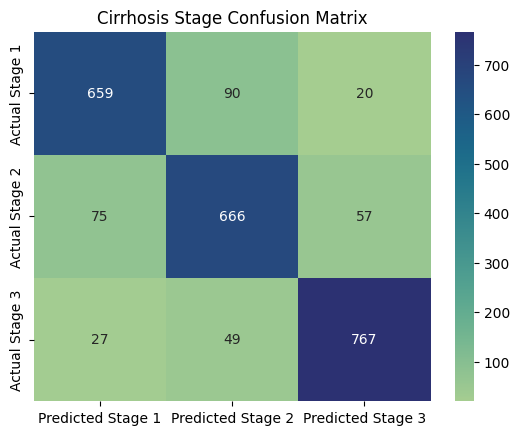

In [ ]:
# Evaluate the random forest model
# Calculate the confusion matrix
c_matrix = confusion_matrix(y_test, rf_predictions)
c_matrix_df = pd.DataFrame(
    c_matrix, index=["Actual Stage 1", "Actual Stage 2", "Actual Stage 3"], columns=["Predicted Stage 1", "Predicted Stage 2", "Predicted Stage 3"]
)

# Calculate the accuracy score
acc_score = accuracy_score(y_test, rf_predictions)

#Display classification report
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, rf_predictions))

# Display confusion matrix
# seaborn heatmap documentation: https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(c_matrix_df, cmap="crest", annot=True, fmt='g')
plt.title("Cirrhosis Stage Confusion Matrix")
plt.show()

<Axes: title={'center': 'Feature Importances'}, ylabel='Features'>

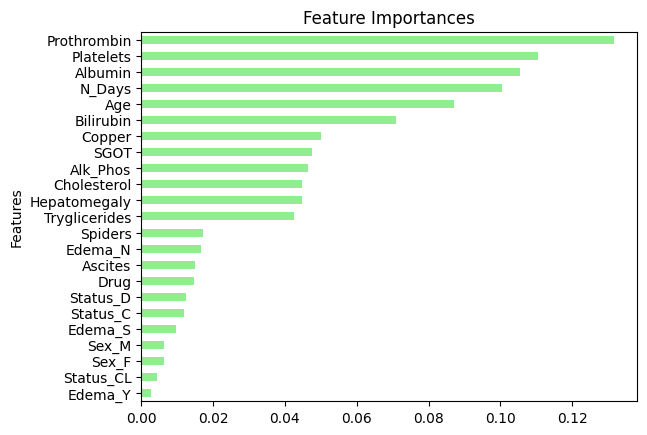

In [ ]:
#evaluate importance of the input features
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns),reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Feature Importances', ylabel= 'Features', legend=False)